In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr
from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

/home/sallen/anaconda/envs/py36/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')

In [3]:
imin, imax = 350, 600
jmin, jmax = 150, 350

In [66]:
def make_plots(fig, ax, variable, name, ng, hd, cmap, vmaxm, vminm, scale, timestep=0):
    green = np.array(ng.variables[variable][timestep])
    hind = np.array(hd.variables[variable][timestep])

    colors = axs[0, 0].pcolormesh(green[0, imin:imax, jmin:jmax], cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[0, 0], extend='both')

    colors = axs[0, 1].pcolormesh(hind[0, imin:imax, jmin:jmax], cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[0, 1], extend='both')

    colors = axs[0, 2].pcolormesh(hind[0, imin:imax, jmin:jmax] - green[0, imin:imax, jmin:jmax], cmap='bwr', vmax=scale, vmin=-scale)
    fig.colorbar(colors, ax=axs[0, 2], extend='both')

    for ax in [axs[0, 0], axs[0, 1], axs[0, 2]]:
        viz_tools.set_aspect(ax)
  
    for i in range(1, 3):
        cbar = vis.contour_thalweg(axs[i, 0], green, bathy, mesh, np.arange(vminm, 1.02*vmaxm, 0.05*(vmaxm-vminm)), cmap=cmap)
        cbar = vis.contour_thalweg(axs[i, 1], hind, bathy, mesh, np.arange(vminm, 1.02*vmaxm, 0.05*(vmaxm-vminm)), cmap=cmap)
        cbar = vis.contour_thalweg(axs[i, 2], hind-green, bathy, mesh, np.arange(-scale, 1.05*scale, 0.1*scale), cmap='bwr')
    for ax in [axs[2, 0], axs[2, 1], axs[2, 2]]:
        ax.set_ylim((20, 0))
        ax.set_xlim((300, 500))
        
    axs[0,0].set_title('Base (Ops winds 201812)')
    axs[0,1].set_title('GEMLAM (Gemlam winds)')
    axs[0,2].set_title('GEMLAM - Ops')

In [102]:
def make_plots_2d(fig, ax, variable, name, ng, hd, cmap, vmaxm, vminm, scale, timestep=0):
    green = np.array(ng.variables[variable][timestep])
    hind = np.array(hd.variables[variable][timestep])

    colors = axs[0].pcolormesh(green[imin:imax, jmin:jmax], cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[0], extend='both')

    colors = axs[1].pcolormesh(hind[imin:imax, jmin:jmax], cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[1], extend='both')

    colors = axs[2].pcolormesh(hind[imin:imax, jmin:jmax] - green[imin:imax, jmin:jmax], cmap='bwr', vmax=scale, vmin=-scale)
    fig.colorbar(colors, ax=axs[2], extend='both')

    for ax in axs:
        viz_tools.set_aspect(ax)
  
        
    axs[0].set_title('OPS '+name)
    axs[1].set_title('GEMLAM '+name)
    axs[2].set_title('GEMLAM - Ops')

# Physics

In [143]:
ng = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/ops_oneday/SalishSea_1h_20141101_20141101_grid_T_20141101-20141101.nc')
hd = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/gemlam_oneday/SalishSea_1h_20141101_20141101_grid_T_20141101-20141101.nc')

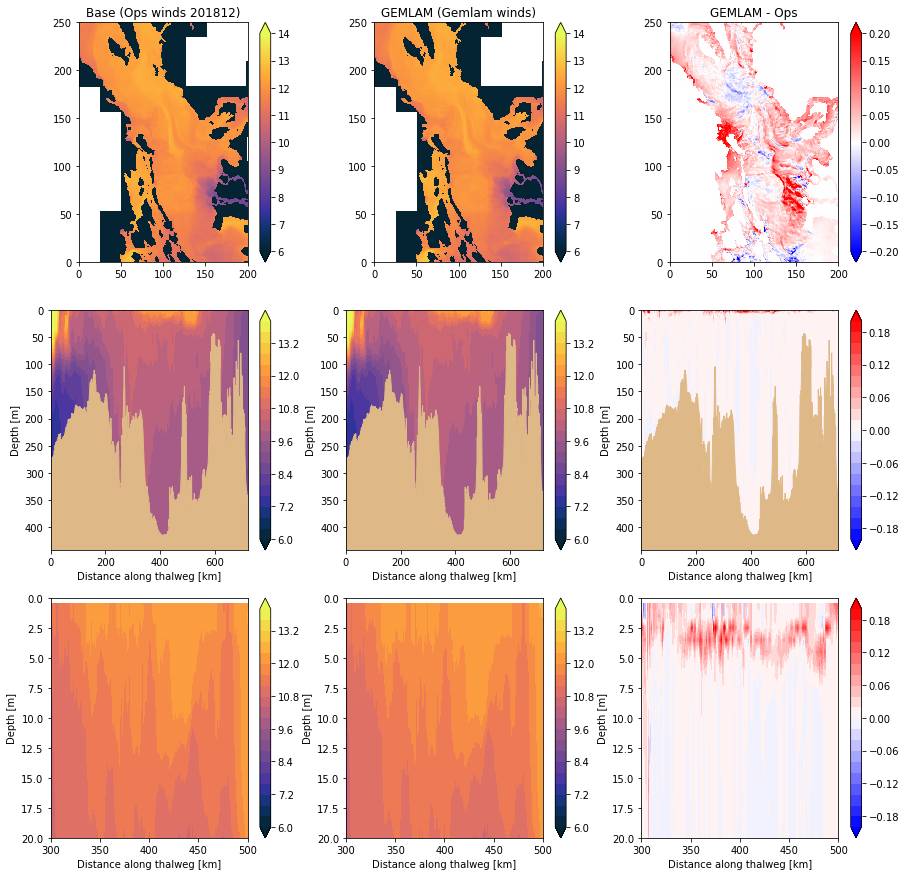

In [134]:
variable, name, cmap = 'votemper', 10, cm.thermal
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 14, 6, 0.2, timestep=2)

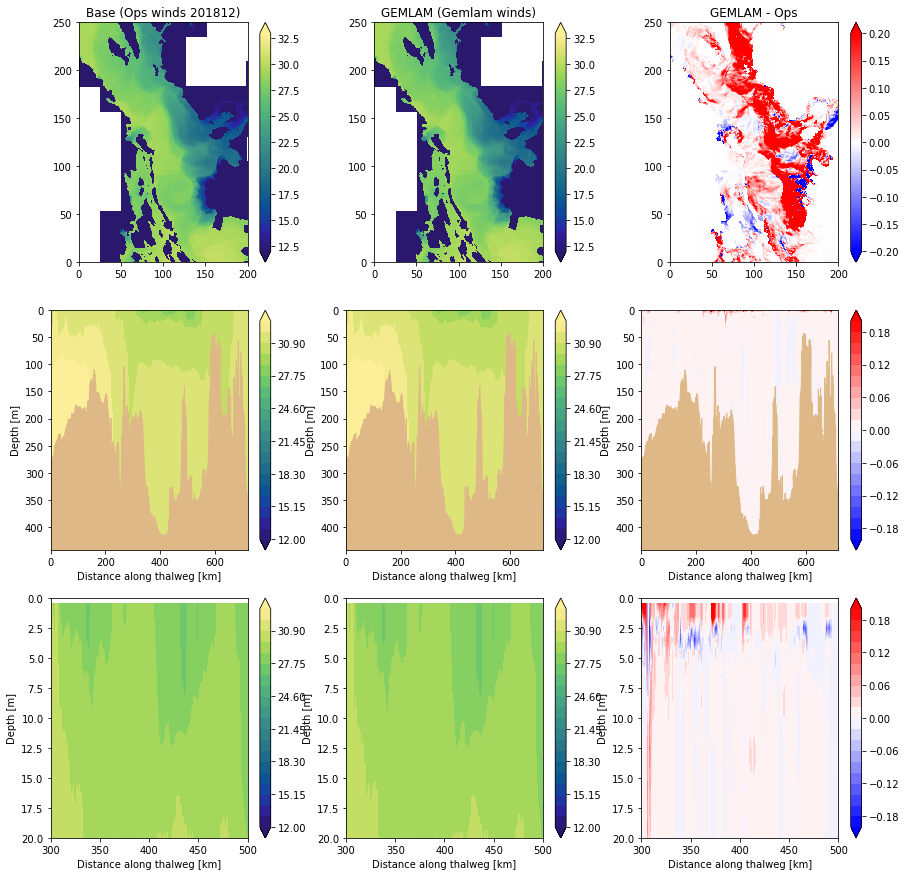

In [135]:
variable, name, cmap = 'vosaline', 'salinity', cm.haline
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 33, 12, 0.2, timestep=2)

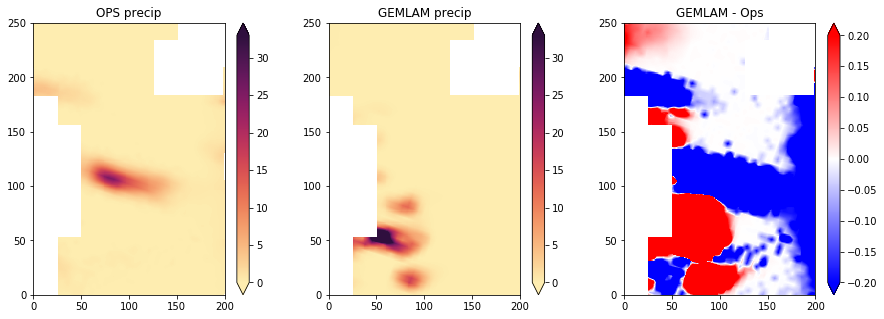

In [144]:
variable, name, cmap = 'precip', 'precip', cm.matter
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots_2d(fig, axs, variable, name, ng, hd, cmap, 33, 0, 0.2, timestep=0)

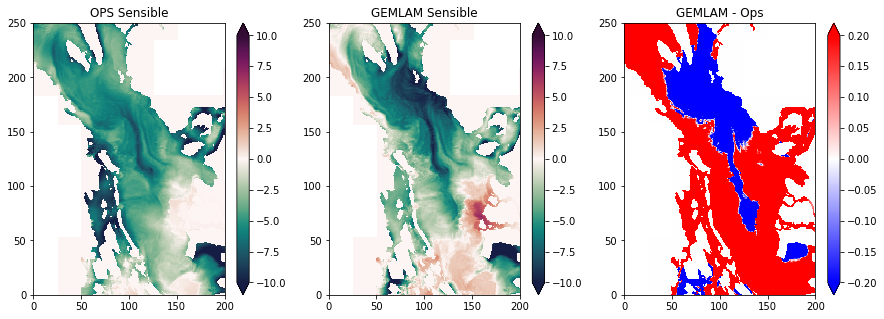

In [137]:
variable, name, cmap = 'qsb_oce', 'Sensible', cm.curl
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots_2d(fig, axs, variable, name, ng, hd, cmap, 10, -10, 0.2, timestep=0)

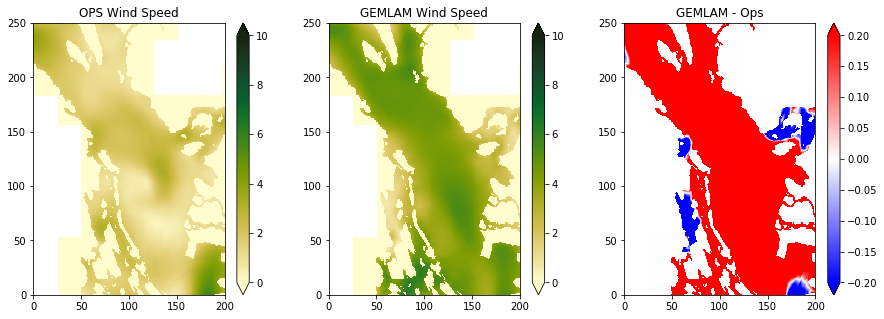

In [138]:
variable, name, cmap = 'wspd', 'Wind Speed', cm.speed
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots_2d(fig, axs, variable, name, ng, hd, cmap, 10, 0, 0.2, timestep=0)

# Velocity

In [139]:
ng = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/ops_oneday/SalishSea_1h_20141101_20141101_grid_V_20141101-20141101.nc')
hd = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/gemlam_oneday/SalishSea_1h_20141101_20141101_grid_V_20141101-20141101.nc')

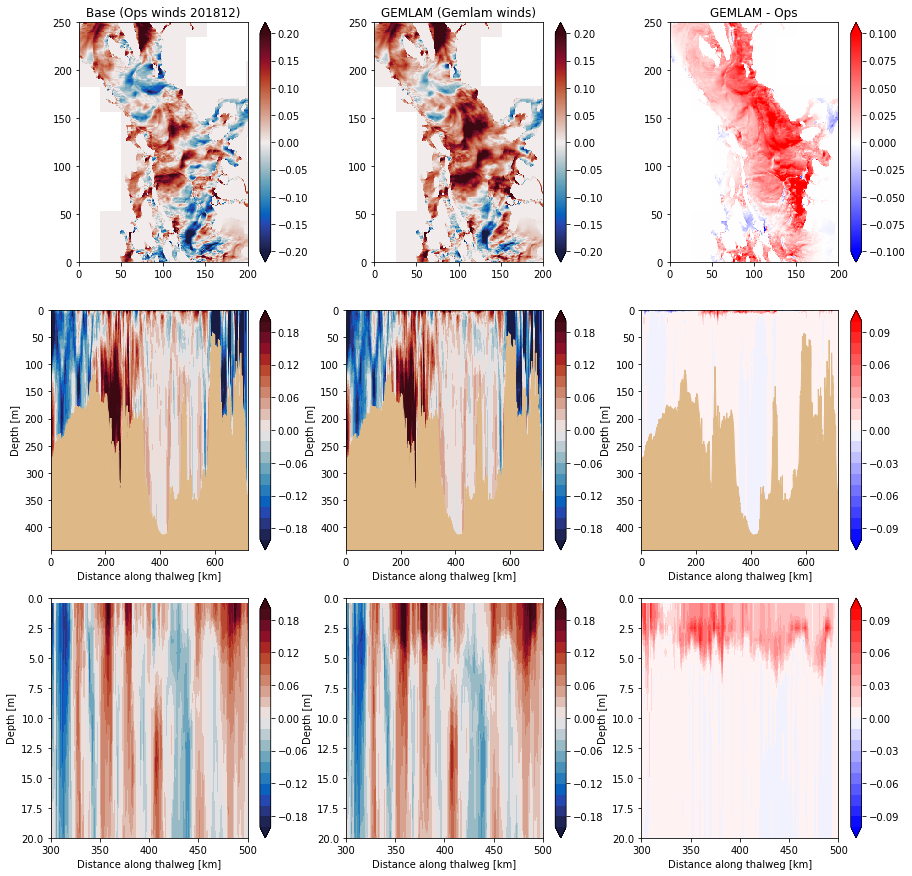

In [86]:
variable, name, cmap = 'vomecrty', 'Along-strait Velocity', cm.balance
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 0.2, -0.2, 0.1, timestep=2)

Stronger currents to the north throughout the main strait, consistent with stronger winds to the north.

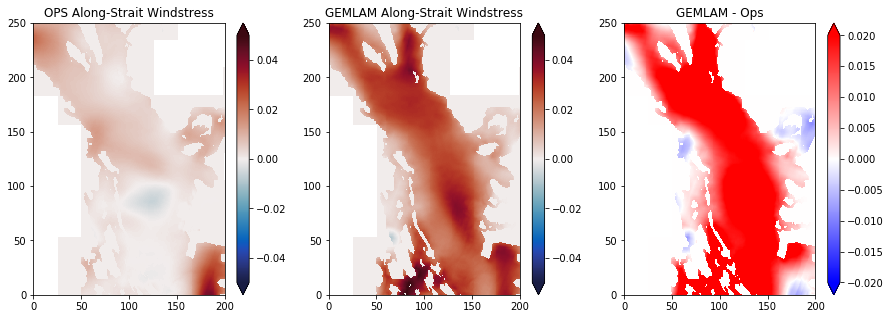

In [141]:
variable, name, cmap = 'vtau', 'Along-Strait Windstress', cm.balance
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots_2d(fig, axs, variable, name, ng, hd, cmap, 0.05, -0.05, 0.02, timestep=0)

In [79]:
ng = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/ops/SalishSea_1h_20141101_20141118_grid_U_20141101-20141101.nc')
hd = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/gemlam/SalishSea_1h_20141101_20141118_grid_U_20141101-20141101.nc')

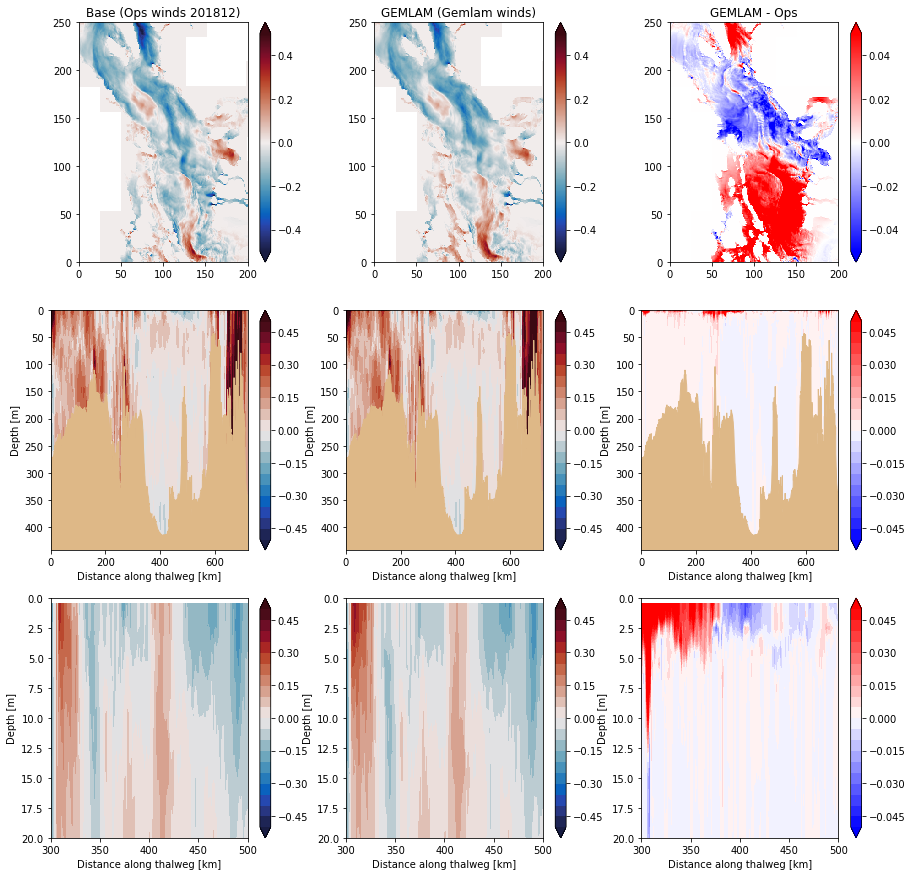

In [83]:
variable, name, cmap = 'vozocrtx', 'Across-strait Velocity', cm.balance
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 0.5, -0.5, 0.05, timestep=2)

In central strait stronger currents to the west and in the southern strait stronger currents to the east.

# Biology

In [39]:
ng = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/ops/SalishSea_1d_20141101_20141118_ptrc_T_20141118-20141118.nc')
hd = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/gemlam/SalishSea_1d_20141101_20141118_ptrc_T_20141118-20141118.nc')

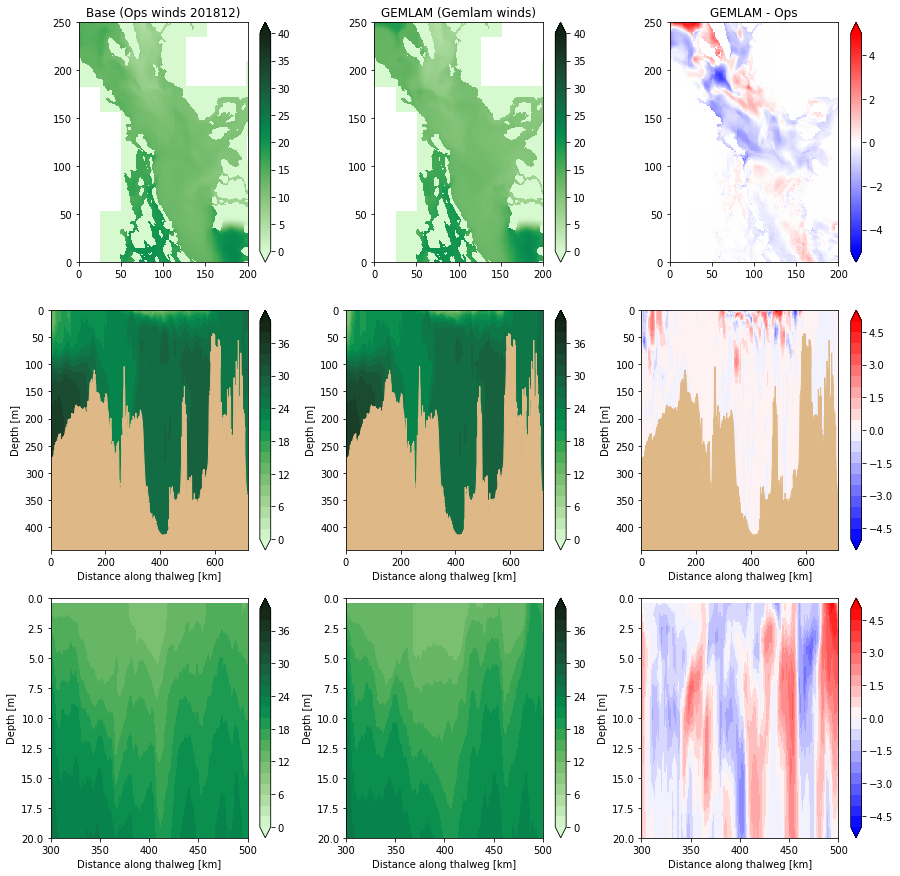

In [41]:
variable, name, cmap = 'nitrate', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 40, 0, 5)

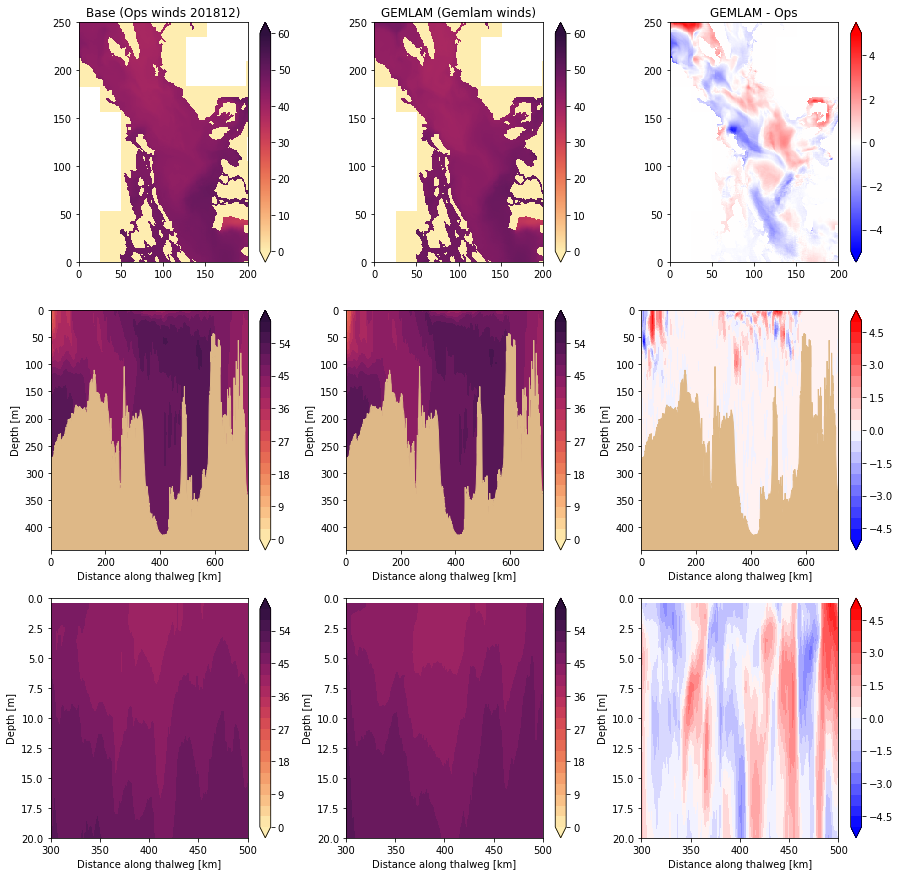

In [42]:
variable, name, cmap = 'silicon', 10, cm.matter
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 60, 0, 5)

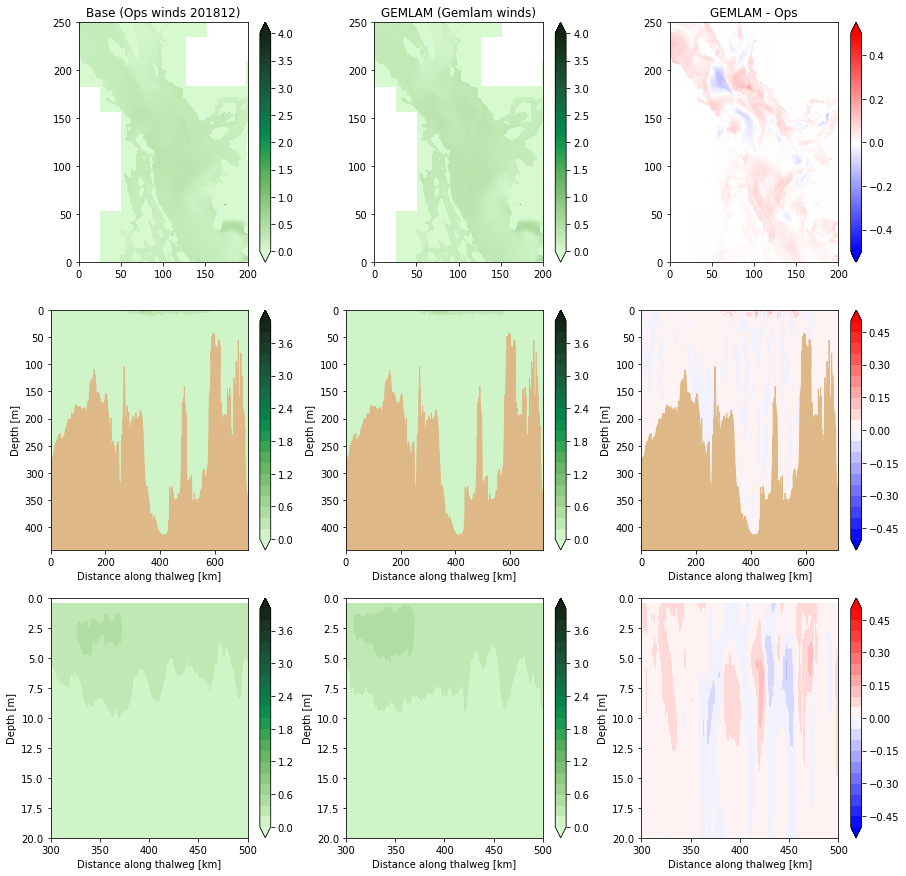

In [44]:
variable, name, cmap = 'diatoms', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 4, 0, 0.5)

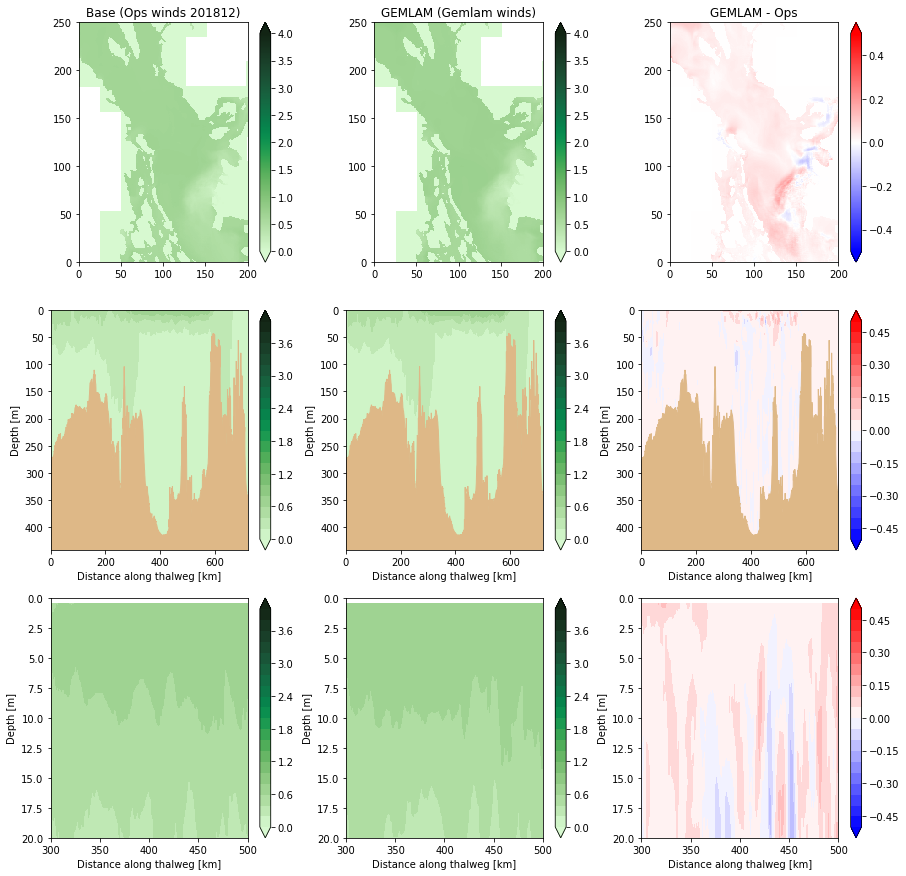

In [45]:
variable, name, cmap = 'flagellates', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 4, 0, 0.5)

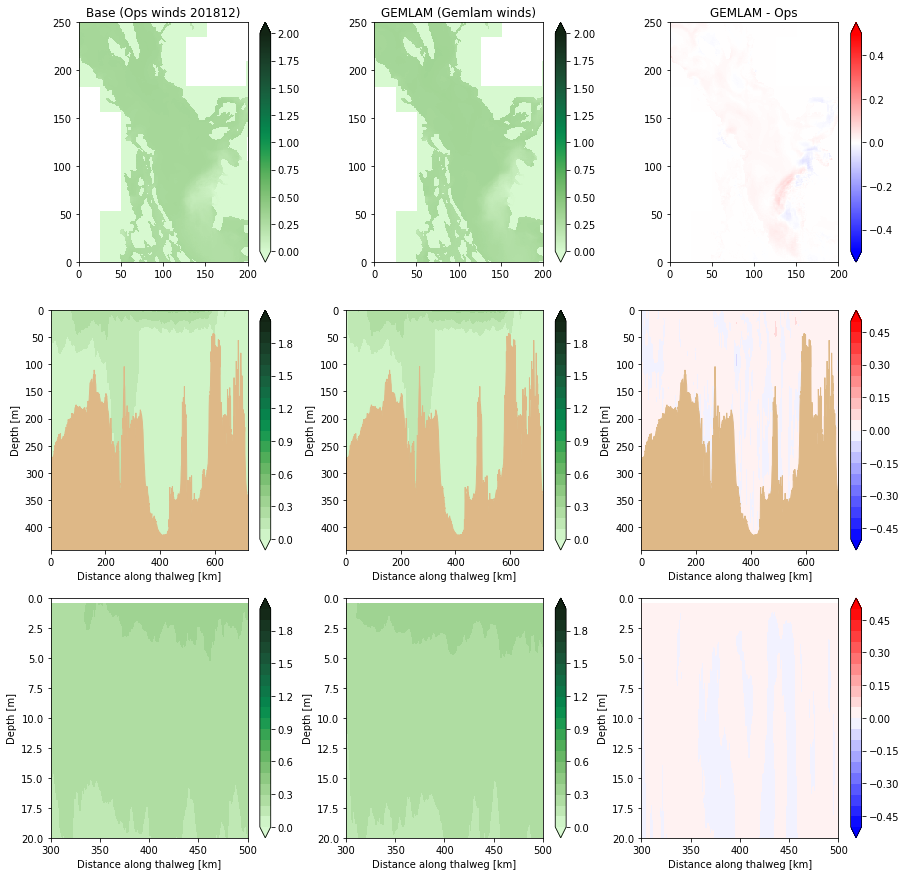

In [46]:
variable, name, cmap = 'ciliates', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 2, 0, 0.5)

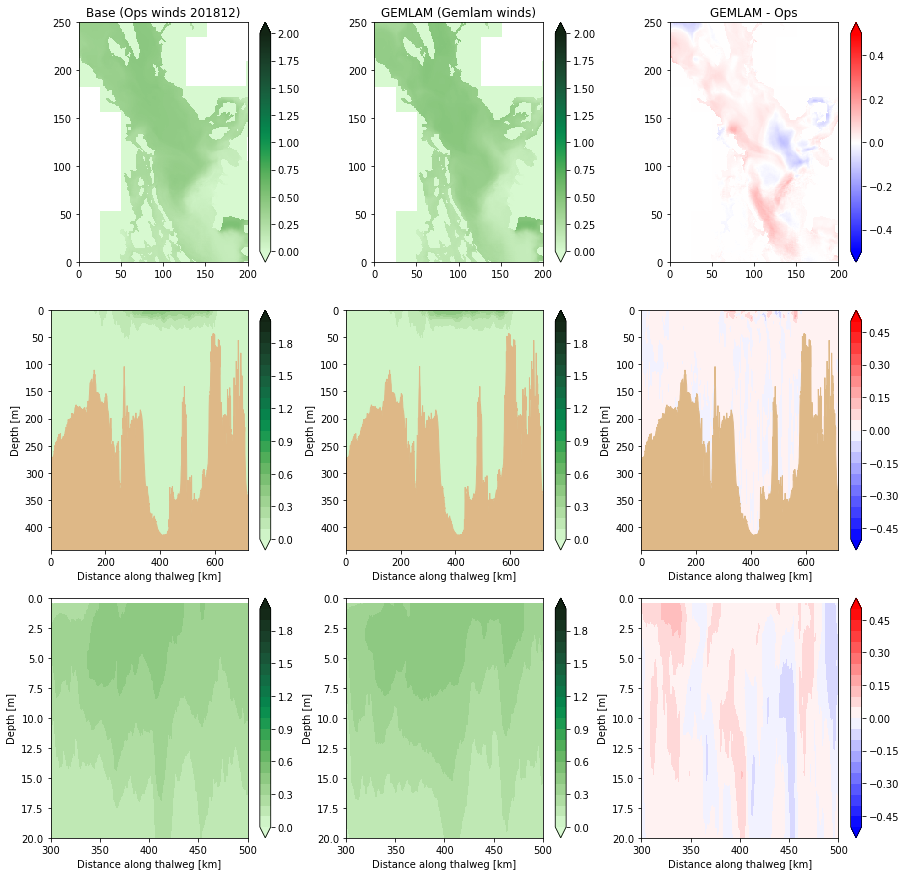

In [47]:
variable, name, cmap = 'microzooplankton', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 2, 0, 0.5)

# Carbon

In [48]:
ng = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/ops/SalishSea_1d_20141101_20141118_carp_T_20141118-20141118.nc')
hd = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/gemlam/SalishSea_1d_20141101_20141118_carp_T_20141118-20141118.nc')

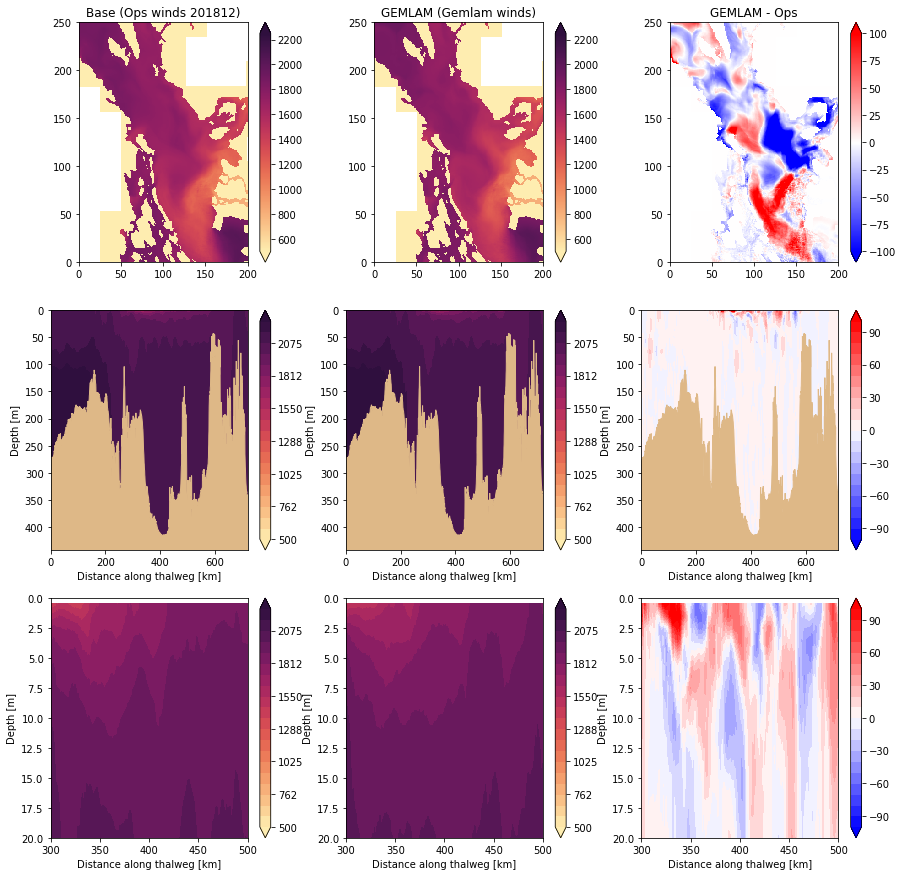

In [49]:
variable, name, cmap = 'dissolved_inorganic_carbon', 10, cm.matter
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 2250, 500, 100)

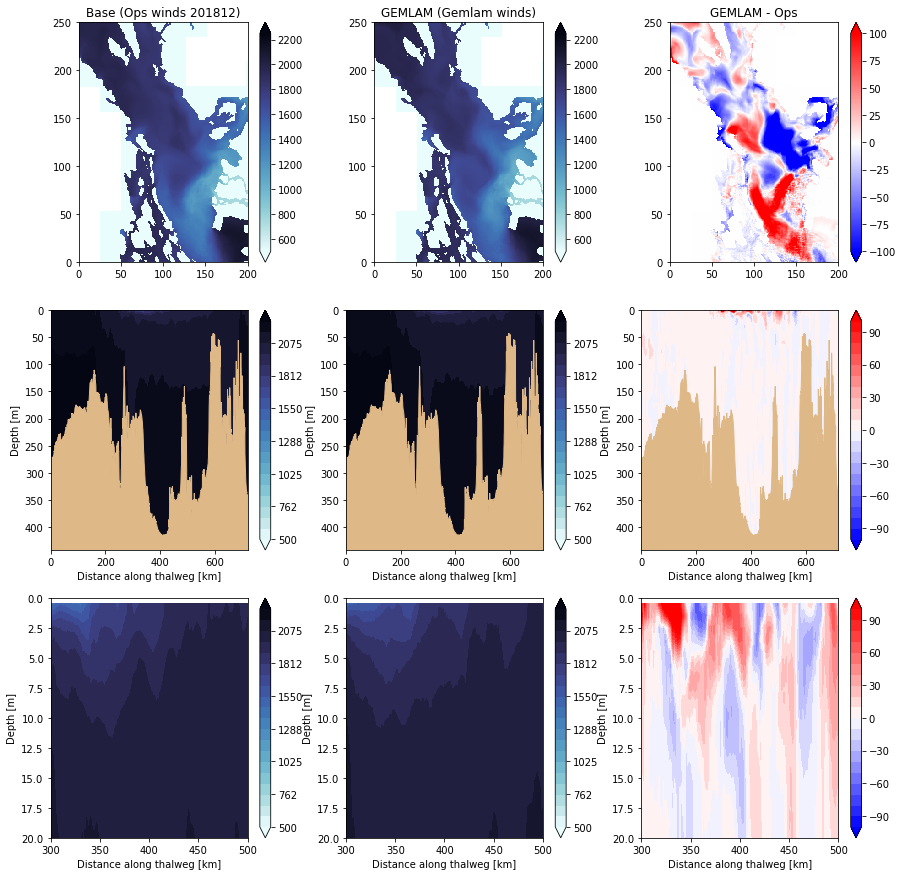

In [50]:
variable, name, cmap = 'total_alkalinity', 10, cm.ice_r
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 2250, 500, 100)

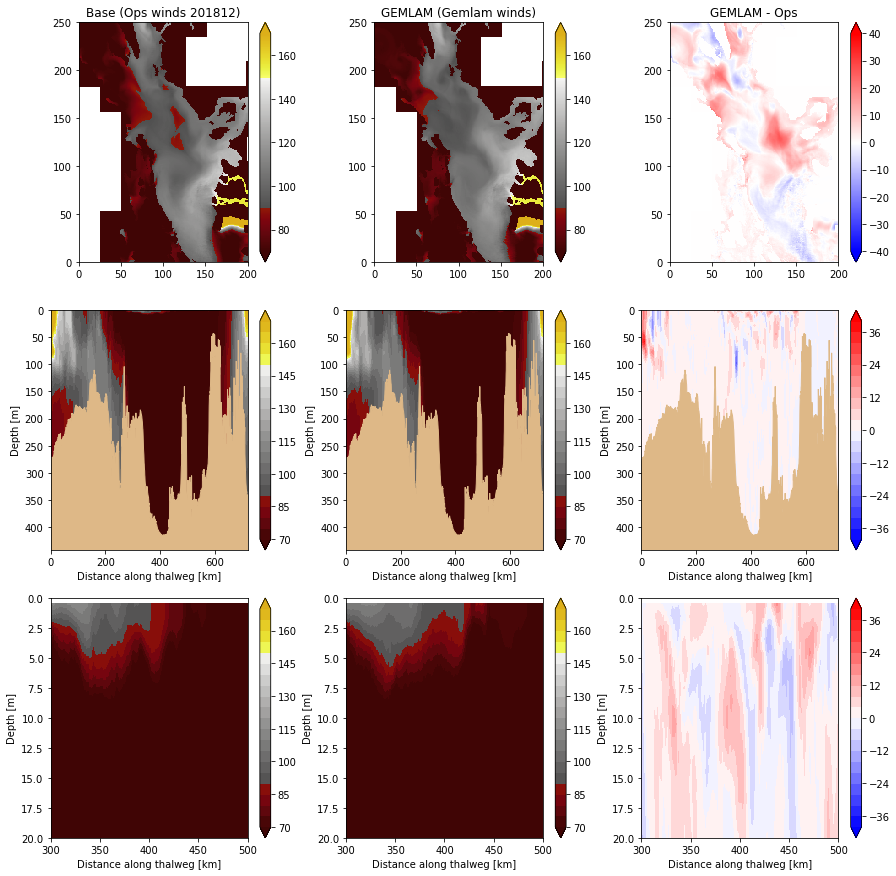

In [51]:
variable, name, cmap = 'dissolved_oxygen', 10, cm.oxy
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 170, 70, 40)

In [ ]:
import netCDF4 as nc

In [148]:
ncds = nc.Dataset('/home/sallen/MEOPAR/grid/weights-gem2.5-ops_201702.nc')

60043


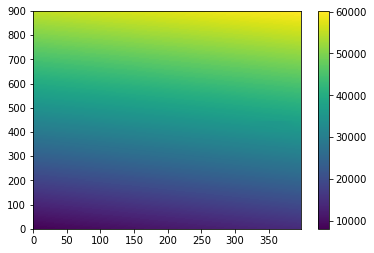

In [166]:
plt.pcolormesh(ncds.variables['src01'])
plt.colorbar()
print(np.array(ncds.variables['src01']).max(axis=0).max(axis=0))

In [156]:
gmds = nc.Dataset('/home/sallen/MEOPAR/grid/weights-gem2.5-gemlam_201702.nc')

57995


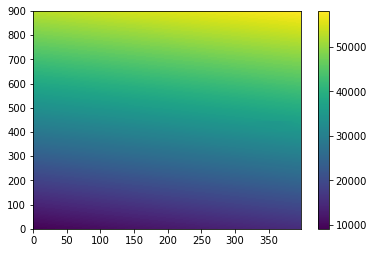

In [167]:
plt.pcolormesh(gmds.variables['src01'])
plt.colorbar()
print(np.array(gmds.variables['src01']).max(axis=0).max(axis=0))

In [169]:
ops = nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m11d01.nc')

13.2785225


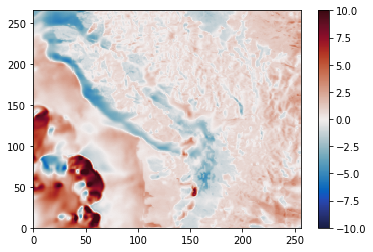

In [175]:
plt.pcolormesh(ops.variables['u_wind'][0], cmap=cm.balance, vmax=10, vmin=-10)
plt.colorbar()
print(np.array(ops.variables['u_wind'][0]).max(axis=0).max(axis=0))

In [171]:
gem = nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2014m11d01.nc')

16.175318


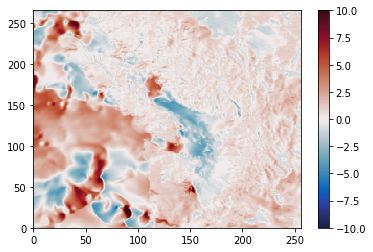

In [176]:
plt.pcolormesh(gem.variables['u_wind'][0], cmap=cm.balance, vmax=10, vmin=-10)
plt.colorbar()
print(np.array(gem.variables['u_wind'][0]).max(axis=0).max(axis=0))